In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision

class RC:
    def __init__(self,
                 N_input,
                 N_hidden,
                 N_output,
                 alpha,
                 ) -> None:
        self.N_in = N_input
        self.N_hid = N_hidden
        self.N_out = N_output
        self.alpha = alpha
        
    def reset(self,):
        self.W_in = np.random.uniform(low=np.zeros((self.N_hid, self.N_in)), 
                                      high=np.ones((self.N_hid, self.N_in)))
        self.A = np.random.uniform(low=np.zeros((self.N_hid, self.N_hid)), 
                                   high=np.ones((self.N_hid, self.N_hid)))
        self.W_out = np.random.uniform(low=np.zeros((self.N_out, self.N_hid)), 
                                   high=np.ones((self.N_out, self.N_hid)))
        self.r_history = np.zeros((self.N_hid, 1))
        
        
    def activation(self, x):
        return np.tanh(x)
    
    def forward(self, x):
        Ar = np.matmul(self.A, self.r_history)
        U = np.matmul(self.W_in, x)
        r = (1-self.alpha) * self.r_history + self.alpha * self.activation(Ar + U)
        y = np.matmul(self.W_out, r)
        self.r_history = r
        
        return y

In [27]:
import random, torch
import torchvision.transforms as transforms
idx = random.sample(list(range(60000)), 600)
train = torchvision.datasets.MNIST(root='./reservoir/data/',
                                        train=True,
                                        transform=transforms.ToTensor(),
                                        download=False,
                                        )
train.data = train.data[idx]
from torch.utils.data import DataLoader
train_loader = torch.utils.data.DataLoader(train, 
                                               batch_size=10, 
                                               shuffle=True, 
                                               num_workers=0)


In [44]:
X,Y,Z = 10,10,10
V = np.zeros((X, Y, Z), [('x', float), ('y', float), ('z', float)])
V['x'], V['y'], V['z'] = np.meshgrid(np.linspace(0, Y - 1, Y), 
                                        np.linspace(0, X - 1, X),
                                        np.linspace(0, Z - 1, Z))
V = V.reshape(X * Y * Z)
np.random.shuffle(V)


In [182]:
np.random.gamma(0.5)

0.6796920196694364

[-10, 1010, 0, 1]

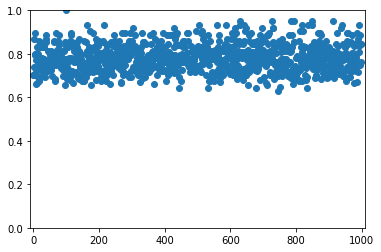

In [189]:
dis = []
for i in range(1000):
    distance = np.exp(-np.sqrt((V[100][0]-V[i][0])**2+
                                (V[100][1]-V[i][1])**2+
                                (V[100][2]-V[i][2])**2)*0.05
                     )
    dis.append(distance)

plt.plot(dis,'o')
plt.axis([-10,1010,0,1])

In [30]:
label_count = [0]*10
for i, (images, labels) in enumerate(train_loader):
    for l in labels:
        label_count[l] += 1
print(label_count)

[58, 79, 64, 59, 59, 51, 54, 62, 49, 65]


In [3]:
train = torchvision.datasets.MNIST(root='./reservoir/data/',
                                        train=True,
                                        transform=None,
                                        download=False,
                                        )
train_data = train.data.float()/255
print('train shape:', train_data.shape)


train shape: torch.Size([60000, 28, 28])


In [21]:
img = (train.data[0].float()/255 > torch.rand(train.data[0].size())).float().numpy()

In [24]:
    train_dataset = torchvision.datasets.MNIST(root= './reservoir/data/', train=True, download=False, transform=None)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=0)


In [34]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [33]:
np.round(inv(np.random.rand(5, 5)),2)

array([[  8.98,  -0.59, -11.  ,  10.5 ,   1.44],
       [ -2.02,  -0.28,   4.04,  -3.55,  -0.94],
       [ -8.4 ,   1.7 ,   9.91,  -7.76,  -3.03],
       [ -8.47,   1.53,  10.41, -10.63,  -0.96],
       [ 10.53,  -2.08, -12.82,  12.39,   2.99]])

In [46]:
from scipy.linalg import pinv
from numpy.linalg import inv
X = np.random.rand(5, 600)
R = np.random.rand(10, 600)
R_inv = np.matmul(R.T, inv(np.matmul(R, R.T) + 1e-8*np.eye(10)))
np.round(np.matmul(X, R_inv),2)

array([[0.  , 0.13, 0.03, 0.14, 0.1 , 0.17, 0.11, 0.05, 0.16, 0.1 ],
       [0.08, 0.11, 0.1 , 0.05, 0.07, 0.07, 0.17, 0.13, 0.07, 0.1 ],
       [0.05, 0.13, 0.04, 0.09, 0.14, 0.14, 0.05, 0.14, 0.06, 0.12],
       [0.11, 0.09, 0.05, 0.12, 0.11, 0.14, 0.07, 0.12, 0.04, 0.08],
       [0.1 , 0.1 , 0.05, 0.1 , 0.11, 0.11, 0.16, 0.07, 0.07, 0.11]])

In [50]:
np.round(np.matmul(X, pinv(R)), 2)

array([[0.  , 0.13, 0.03, 0.14, 0.1 , 0.17, 0.11, 0.05, 0.16, 0.1 ],
       [0.08, 0.11, 0.1 , 0.05, 0.07, 0.07, 0.17, 0.13, 0.07, 0.1 ],
       [0.05, 0.13, 0.04, 0.09, 0.14, 0.14, 0.05, 0.14, 0.06, 0.12],
       [0.11, 0.09, 0.05, 0.12, 0.11, 0.14, 0.07, 0.12, 0.04, 0.08],
       [0.1 , 0.1 , 0.05, 0.1 , 0.11, 0.11, 0.16, 0.07, 0.07, 0.11]])

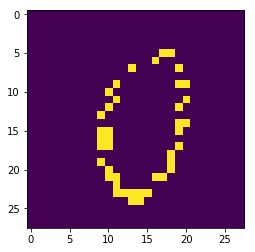

In [8]:
from torch.distributions import Poisson, Uniform
import torch

p = Uniform(low=torch.zeros(28,28), high=torch.ones(28,28))
img = p.sample()
idx = img<=(train_data[1000]-0.5)
img = torch.zeros_like(img)
img[idx] = 1
plt.imshow(img)

In [ ]:
img.flatten().numpy()